In [1]:
import pandas as pd
from random import sample, choices

n = 20
firstNames = choices('赵钱孙李周吴郑王董孙', k=n)
lastNames = choices('一二三四五六七八九', k=n)
names = list({f+l for f, l in zip(firstNames, lastNames)})
df = pd.DataFrame({'姓名': names,
                   '分数': choices(range(70,90), k=len(names))})
print('原始数据'.center(30,'='), df, sep='\n')
# 分数最高的前5个人，分数相同的保留第一项
print('分数最高的前5个人，最后一个分数相同的话保留第一项'.center(30,'='))
print(df.nlargest(5, '分数'))
# 分数最高的前5个人，分数相同的保留最后一项
print('分数最高的前5个人，最后一个分数相同的话保留最后一项'.center(30,'='))
print(df.nlargest(5, '分数', keep='last'))
# 分数最高的前5个人，分数相同的保留所有人
print('分数最高的前5个人，最后一个分数相同的话保留所有人'.center(30,'='))
print(df.nlargest(5, '分数', keep='all'))
# 最高的前5个分数对应的信息
first5 = sorted(set(df.分数.values), reverse=True)[:5]
print('最高的前5个分数对应的信息'.center(30,'='))
print(df[df.分数.isin(first5)])


=============原始数据=============
    姓名  分数
0   孙九  85
1   孙三  82
2   吴一  72
3   郑一  76
4   郑八  74
5   钱九  83
6   孙四  88
7   赵八  71
8   吴七  81
9   孙二  77
10  郑七  76
11  郑九  83
12  郑四  74
13  王四  71
14  孙六  86
15  李四  85
16  周一  81
17  钱七  82
==分数最高的前5个人，最后一个分数相同的话保留第一项===
    姓名  分数
6   孙四  88
14  孙六  86
0   孙九  85
15  李四  85
5   钱九  83
==分数最高的前5个人，最后一个分数相同的话保留最后一项==
    姓名  分数
6   孙四  88
14  孙六  86
15  李四  85
0   孙九  85
11  郑九  83
==分数最高的前5个人，最后一个分数相同的话保留所有人===
    姓名  分数
6   孙四  88
14  孙六  86
0   孙九  85
15  李四  85
5   钱九  83
11  郑九  83
========最高的前5个分数对应的信息=========
    姓名  分数
0   孙九  85
1   孙三  82
5   钱九  83
6   孙四  88
11  郑九  83
14  孙六  86
15  李四  85
17  钱七  82


In [2]:
import pandas as pd

df1 = pd.DataFrame({'A': [None, 3, 5], 'B': [3, None, None]},
                   index=['x1','x2','x3'])
df2 = pd.DataFrame({'A': [8, None, 8, 9], 'B': [None, 6, 6, 9],
                    'C': [666, None, 999, None]},
                   index=['x1','x2','x3', 'x4'])
print('===演示数据：', df1, df2, sep='\n')
# 使用参数other中的值更新当前对象中的缺失值
print('===combine_first()方法处理结果：', df1.combine_first(df2), sep='\n')
# 以另一个DataFrame对象为准，原地修改当前DataFrame中的缺失值
# 保留原始DataFrame对象的行标签和列标签
# overwrite=False时只更新当前DataFrame中的缺失值
df1.update(df2, overwrite=False)
print('===update()方法处理结果：', df1, sep='\n')


===演示数据：
      A    B
x1  NaN  3.0
x2  3.0  NaN
x3  5.0  NaN
      A    B      C
x1  8.0  NaN  666.0
x2  NaN  6.0    NaN
x3  8.0  6.0  999.0
x4  9.0  9.0    NaN
===combine_first()方法处理结果：
      A    B      C
x1  8.0  3.0  666.0
x2  3.0  6.0    NaN
x3  5.0  6.0  999.0
x4  9.0  9.0    NaN
===update()方法处理结果：
      A    B
x1  8.0  3.0
x2  3.0  6.0
x3  5.0  6.0


In [3]:
from pandas import cut, value_counts

scores = [89,70,49,87,92,84,73,71,78,81,90,37,
          77,82,81,79,80,82,75,90,54,80,70,68,61]
groups = value_counts(cut(scores,[0,60,70,80,90,101],
                          labels=['不及格','及格','中','良','优秀'],
                          right=False))
print(groups)


良      9
中      8
不及格    3
优秀     3
及格     2
dtype: int64


In [4]:
import pandas as pd

df1 = pd.read_excel('11-13/学生成绩.xlsx', sheet_name='一班',
                    names=['序号', '一班'])
df2 = pd.read_excel('11-13/学生成绩.xlsx', sheet_name='二班')
df2.columns = ['序号', '二班']
df = pd.merge(df1, df2, on='序号')
print(df)


    序号    一班    二班
0    1  80.4  86.4
1    2  88.2  73.4
2    3  82.4  74.2
3    4  77.4  86.4
4    5  95.2  85.8
5    6  80.2  93.8
6    7  94.0  92.8
7    8  81.6  91.0
8    9  80.4  76.0
9   10  90.8  90.2
10  11  87.0  91.6
11  12  82.8  91.2
12  13  79.8  81.2
13  14  92.6  91.4
14  15  84.4  94.2
15  16  68.8  70.8
16  17  85.2  93.8
17  18  85.2  94.0
18  19  89.2  87.0
19  20  83.2  78.4
20  21  84.6  72.0
21  22  87.8  79.4
22  23  71.8  98.8
23  24  85.2  97.2
24  25  87.6  89.8
25  26  90.0  80.6
26  27  79.6  83.2
27  28  87.6  80.0
28  29  76.8  82.0
29  30  89.2  83.2


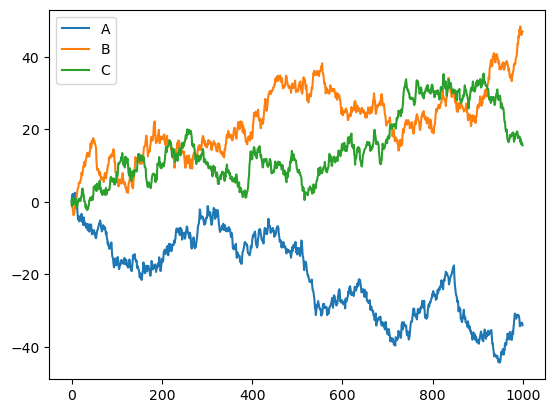

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20220630)
df = pd.DataFrame(np.random.randn(1000, 3), columns=list('ABC')).cumsum()
df.plot.line()     # 绘制折线图，以index为横坐标
plt.show()


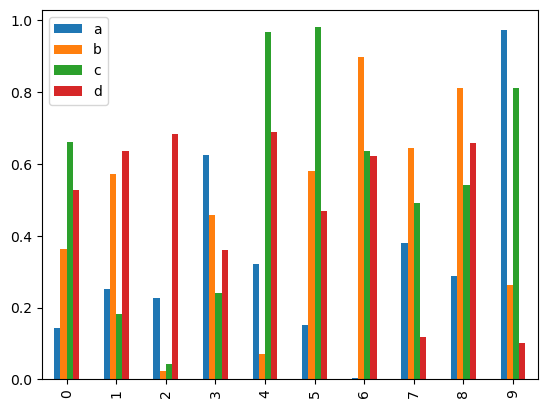

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20220630)
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='bar')       # 绘制柱状图，结果如图2-23所示
plt.show()


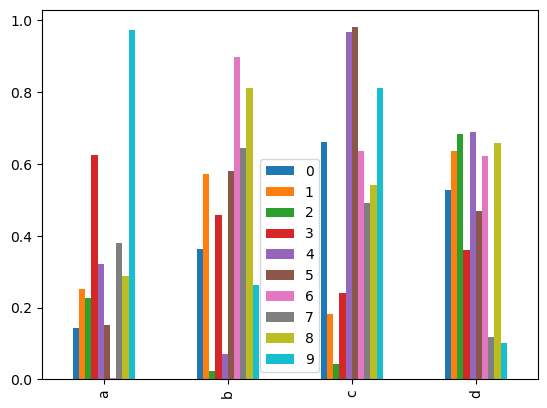

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20220630)
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.T.plot(kind='bar')
# 调整图形窗口大小时图例位置会有所变化
plt.show()


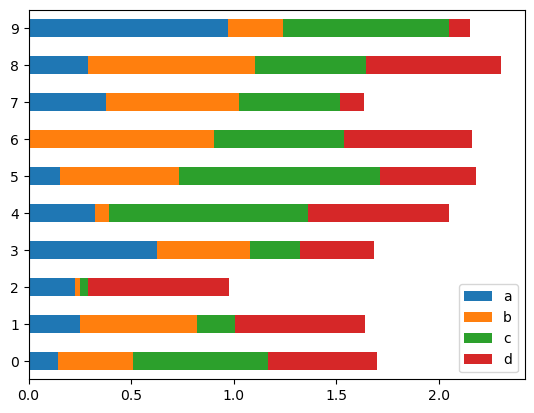

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20220630)
df = pd.DataFrame(np.random.rand(10, 4),
                  columns=['a', 'b', 'c', 'd'])
# 堆叠的水平柱状图，每段长度表示数值大小
df.plot(kind='barh', stacked=True)
plt.show()


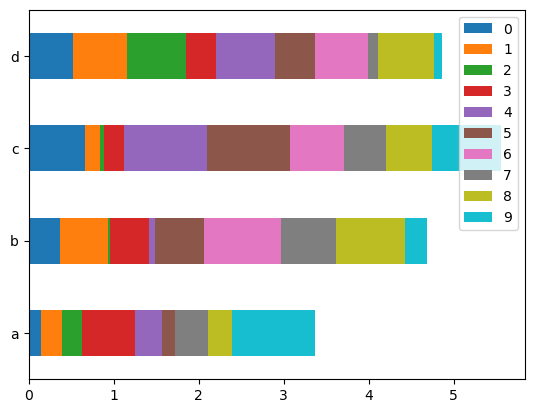

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20220630)
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.T.plot(kind='barh', stacked=True)
plt.show()


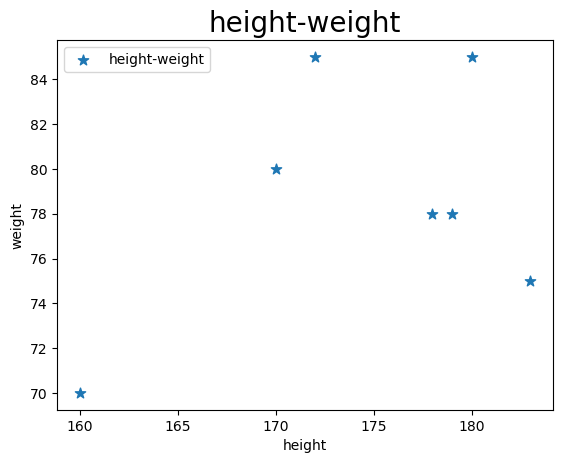

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'height': [180,170,172,183,179,178,160],
                   'weight': [85,80,85,75,78,78,70]})
df.plot(x='height', y='weight', kind='scatter',
        marker='*', s=60, label='height-weight',
        title='height-weight').axes.title.set_size(20)    # 绘制散点图
plt.show()


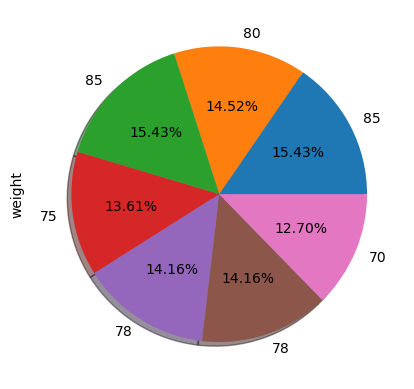

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'height': [180,170,172,183,179,178,160],
                   'weight': [85,80,85,75,78,78,70]})
df['weight'].plot(kind='pie', autopct='{:.2f}%'.format,
                  labels=df['weight'].values,
                  shadow=True)
plt.show()


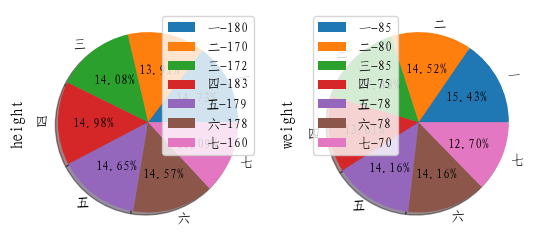

In [27]:
from itertools import count
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['FangSong']
plt.rcParams['font.sans-serif'] = ['FangSong_GB2312']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelsize'] = 'larger'

df = pd.DataFrame({'height': [180,170,172,183,179,178,160],
                   'weight': [85,80,85,75,78,78,70]},
                  index=list('一二三四五六七'))
# 创建两个轴域，分别根据一列的数据绘制饼状图
# 默认以DataFrame对象的index作为每个扇形外侧的标签
ax1, ax2 = df.plot(kind='pie', autopct='{:.2f}%'.format, subplots=True, shadow=True)
# 设置轴域中的图形属性，设置扇形外面的文本
index = count(0, 1)
for child in ax1.get_children():
    if isinstance(child, matplotlib.patches.Wedge):
        child.set_label(f'{child.get_label()}-{df.height.values[next(index)]}')
ax1.legend(loc='upper right')

index = count(0, 1)
for child in ax2.get_children():
    if isinstance(child, matplotlib.patches.Wedge):
        child.set_label(f'{child.get_label()}-{df.weight.values[next(index)]}')
ax2.legend(loc='upper left')

plt.show()


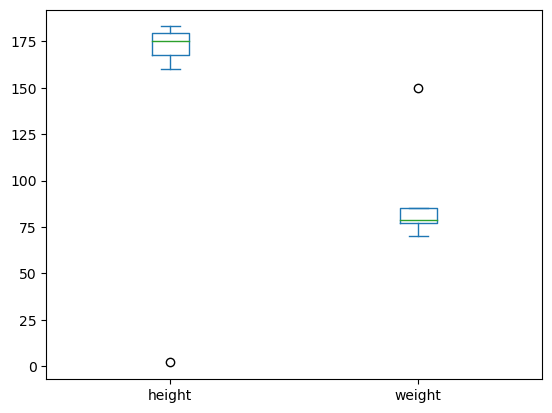

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'height': [180,170,172,183,179,178,160,2],
                   'weight': [85,80,85,75,78,78,70,150]})
df.plot(kind='box')   # 箱图，中间50%使用矩形
                      # 两端的四分之一使用线段
                      # 异常值使用'o'符号

plt.show()


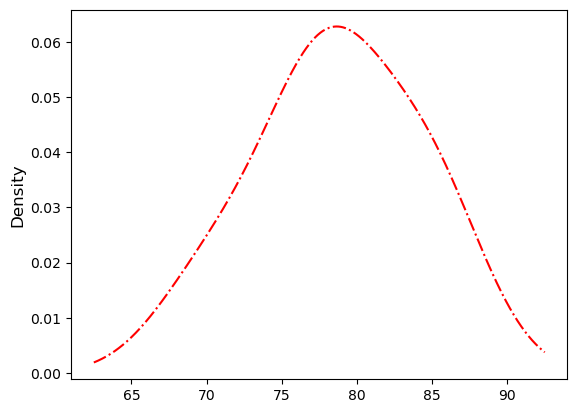

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'height': [180,170,172,183,179,178,160],
                   'weight': [85,80,85,75,78,78,70]})
df['weight'].plot(kind='kde', style='r-.') # 密度图

plt.show()


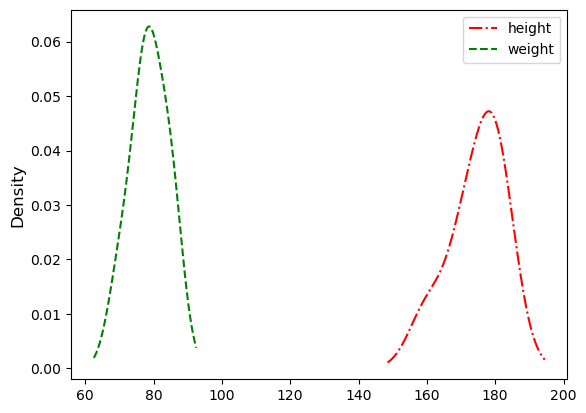

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'height': [180,170,172,183,179,178,160],
                   'weight': [85,80,85,75,78,78,70]})
df.plot(kind='kde', style=['r-.', 'g--']) # 密度图

plt.show()


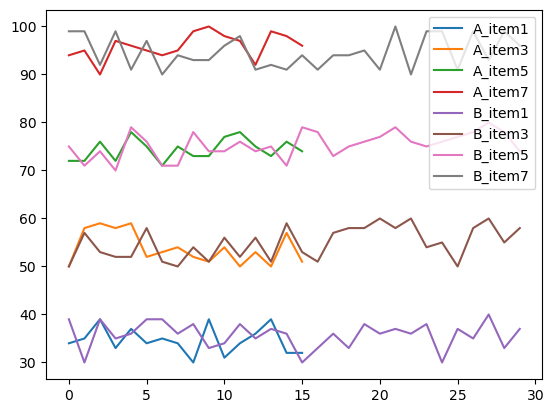

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件中指定的列
df = pd.read_csv('11-13/testData.csv', usecols=[0,1,3,5,7])
# 分离类型A和B的数据，丢弃type列
dfA = df[df.type=='A'].drop('type', axis=1)
dfB = df[df.type=='B'].drop('type', axis=1)
# 修改列名，方便比较
dfA.columns = dfA.columns.map(lambda x: 'A_'+x)
dfB.columns = dfB.columns.map(lambda x: 'B_'+x)
dfA.index = range(len(dfA))
dfB.index = range(len(dfB))
# 绘制图形，指定同一个ax
fig = plt.figure()
ax = plt.gca()
dfA.plot(ax=ax)
dfB.plot(ax=ax)
# 显示图形
plt.show()


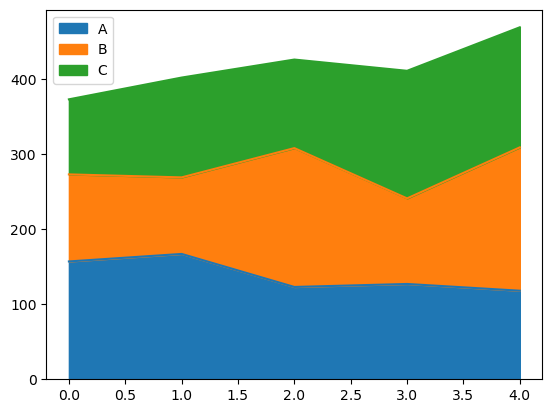

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20220630)
df = pd.DataFrame(np.random.randint(100,200,(5,3)),
                  columns=['A','B','C'])
df.plot(kind='area')     # 绘制面积图
plt.show()


In [18]:
import numpy as np
import pandas as pd

# 模拟转盘100000次
data = np.random.ranf(100000)
# 奖项等级划分
category = (0.0, 0.08, 0.3, 1.0)
labels = ('一等奖', '二等奖', '三等奖')
# 对模拟数据进行划分
result = pd.cut(data, category, labels=labels)
# 统计每个奖项的获奖次数
result = pd.value_counts(result)

# 查看结果
print(result)

三等奖    70063
二等奖    21908
一等奖     8029
dtype: int64


In [19]:
import pandas as pd

df = pd.read_excel('11-13/电影导演演员.xlsx')        # 从Excel文件中读取数据
print(df)

pairs = []
for i in range(len(df)):                      # 遍历每一行数据
    actors = df.at[i, '演员'].split('，')      # 获取当前行的演员清单
    for actor in actors:                      # 遍历每个演员
        pair = (actor, df.at[i, '电影名称'])
        pairs.append(pair)
pairs = sorted(pairs, key=lambda item:int(item[0][2:]))
                                              # 按演员编号进行排序
print(pairs)

index = [item[0] for item in pairs]
data = [item[1] for item in pairs]
df1 = pd.DataFrame({'演员':index, '电影名称':data})
result = df1.groupby('演员', as_index=False).count()
                                              # 分组，统计每个演员的参演电影数量
print(result)

result.columns = ['演员', '参演电影数量']       # 修改列名
print(result)

print(result.nlargest(3, '参演电影数量'))   # 参演电影数量最多的3个演员


    电影名称   导演                  演员
0    电影1  导演1     演员1，演员2，演员3，演员4
1    电影2  导演2     演员3，演员2，演员4，演员5
2    电影3  导演3     演员1，演员5，演员3，演员6
3    电影4  导演1     演员1，演员4，演员3，演员7
4    电影5  导演2     演员1，演员2，演员3，演员8
5    电影6  导演3     演员5，演员7，演员3，演员9
6    电影7  导演4     演员1，演员4，演员6，演员7
7    电影8  导演1     演员1，演员4，演员3，演员8
8    电影9  导演2     演员5，演员4，演员3，演员9
9   电影10  导演3    演员1，演员4，演员5，演员10
10  电影11  导演1    演员1，演员4，演员3，演员11
11  电影12  导演2    演员7，演员4，演员9，演员12
12  电影13  导演3    演员1，演员7，演员3，演员13
13  电影14  导演4   演员10，演员4，演员9，演员14
14  电影15  导演5   演员1，演员8，演员11，演员15
15  电影16  导演6  演员14，演员4，演员13，演员16
16  电影17  导演7         演员3，演员4，演员9
17  电影18  导演8        演员3，演员4，演员10
[('演员1', '电影1'), ('演员1', '电影3'), ('演员1', '电影4'), ('演员1', '电影5'), ('演员1', '电影7'), ('演员1', '电影8'), ('演员1', '电影10'), ('演员1', '电影11'), ('演员1', '电影13'), ('演员1', '电影15'), ('演员2', '电影1'), ('演员2', '电影2'), ('演员2', '电影5'), ('演员3', '电影1'), ('演员3', '电影2'), ('演员3', '电影3'), ('演员3', '电影4'), ('演员3', '电影5'), ('演员3', '电影6'), ('演员3', '电影8'), ('演员3', '电影9'), ('演员3', '电影11

In [20]:
import pandas as pd

df = pd.read_excel('11-13/电影导演演员.xlsx')
# 方法一
print(pd.value_counts('，'.join(df.演员.values).split('，')).nlargest(3))
# 方法二
df.演员 = df.演员.str.split('，')
print(df.explode('演员').groupby('演员').count()
      .nlargest(3, '电影名称')['电影名称'])


演员4    13
演员3    12
演员1    10
dtype: int64
演员
演员4    13
演员3    12
演员1    10
Name: 电影名称, dtype: int64


In [21]:
import csv
import random
import datetime

fn = '11-13/data.csv'

with open(fn, 'w', encoding='cp936', newline='') as fp:
    # 创建csv文件写入对象
    wr = csv.writer(fp)
    # 写入表头
    wr.writerow(['日期', '销量'])

    startDate = datetime.date(2022, 1, 1)
    # 生成365个模拟数据，可以根据需要进行调整
    for i in range(365):
        amount = 300 + i*5 + random.randrange(100)
        wr.writerow([str(startDate), amount])
        startDate = startDate + datetime.timedelta(days=1)


/var/folders/29/05dgb59n56d5s8jgrvd7s8q80000gn/T/ipykernel_20588/2714406637.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby(by='month', as_index=False).sum()


<Figure size 640x480 with 0 Axes>

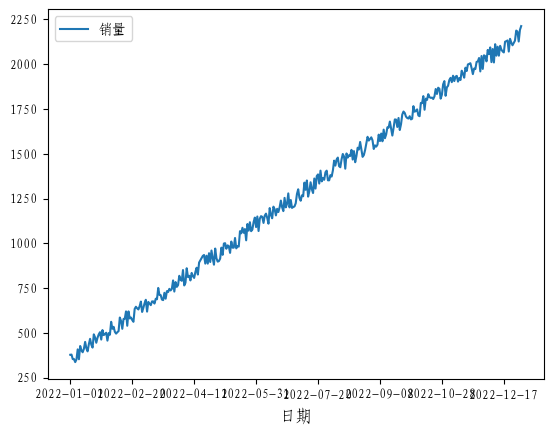

<Figure size 640x480 with 0 Axes>

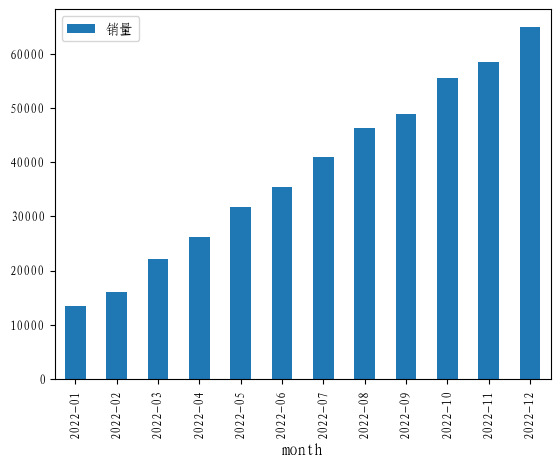

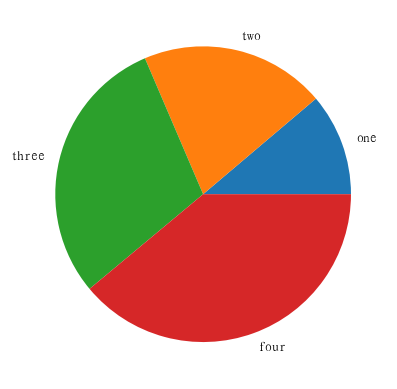

In [28]:
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['font.sans-serif'] = ['FangSong_GB2312']

# 读取数据，丢弃缺失值
df = pd.read_csv('11-13/data.csv', encoding='cp936')
df = df.dropna()

# 生成并保存营业额折线图
plt.figure()
df.plot(x='日期')
plt.savefig('first.jpg')

# 按月统计，生成并保存柱状图
plt.figure()
df1 = deepcopy(df)
df1['month'] = df1['日期'].str.slice(0,7)
df1 = df1.groupby(by='month', as_index=False).sum()
df1.plot(x='month', kind='bar')
plt.savefig('second.jpg')

# 查找涨幅最大的月份，写入文件
df2 = df1.drop('month', axis=1).diff()
m = df2['销量'].nlargest(1).keys()[0]
with open('maxMonth.txt', 'w') as fp:
    fp.write(df1.loc[m, 'month'])

# 按季度统计，生成并保存饼状图
plt.figure()
one = df1[:3]['销量'].sum()
two = df1[3:6]['销量'].sum()
three = df1[6:9]['销量'].sum()
four = df1[9:12]['销量'].sum()
plt.pie([one, two, three, four],
        labels=['one', 'two', 'three', 'four'])
plt.savefig('third.jpg')


/var/folders/29/05dgb59n56d5s8jgrvd7s8q80000gn/T/ipykernel_20588/3934392868.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(by=lambda irow: df.loc[irow, '日期'][:7]).sum()


           销量
2022Q1  13364
2022Q1  16027
2022Q1  22093
2022Q2  26130
2022Q2  31712
2022Q2  35381
2022Q3  40992
2022Q3  46337
2022Q3  49007
2022Q4  55539
2022Q4  58635
2022Q4  65059


<Figure size 640x480 with 0 Axes>

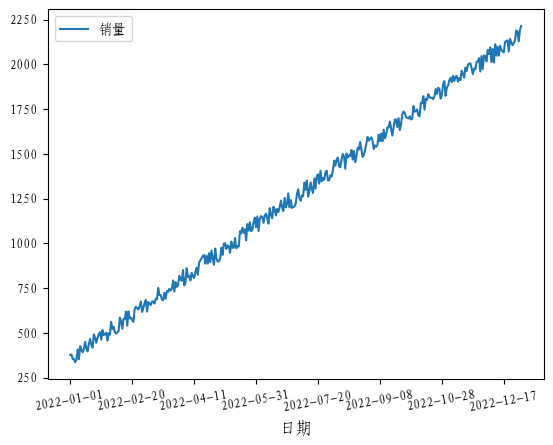

<Figure size 640x480 with 0 Axes>

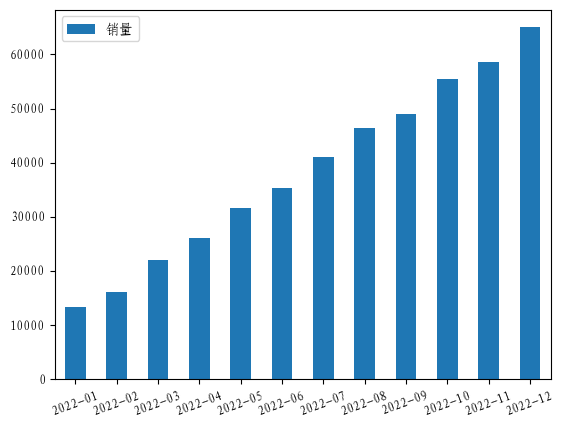

<Figure size 640x480 with 0 Axes>

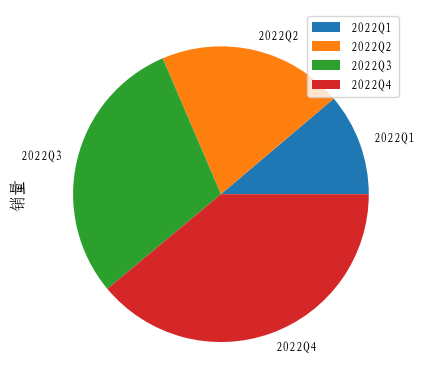

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['font.sans-serif'] = ['FangSong_GB2312']


# 读取数据，丢弃缺失值
df = pd.read_csv('11-13/data.csv', encoding='cp936')
df = df.dropna()

# 生成并保存营业额折线图
plt.figure()
df.plot(x='日期')
plt.xticks(rotation=10)
plt.savefig('first.jpg')

# 按月分组统计，生成并保存柱状图
plt.figure()
df1 = df.groupby(by=lambda irow: df.loc[irow, '日期'][:7]).sum()
df1.plot(kind='bar')
plt.xticks(rotation=20)
# print(df1)
plt.savefig('second.jpg')

# 查找涨幅最大的月份，写入文件
with open('maxMonth.txt', 'w') as fp:
    fp.write(df1.diff()['销量'].nlargest(1).keys()[0])

# 按季度统计，生成并保存饼状图
plt.figure()
df1.index = pd.to_datetime(df1.index).to_period('Q')
print(df1)
df1.groupby(level=0).sum().plot(y='销量', kind='pie')
plt.savefig('third.jpg')


In [24]:
import pandas as pd

# 要读取的网页URL或本地HTML文件路径
url = r'https://mp.weixin.qq.com/s/RtFzEm2TnGHnLTHMz9T4Aw'
# 返回包含若干DataFrame的列表
# 网页上每个表格对应一个DataFrame，每个DataFrame自动以非负整数作为行标签和列标签
dfs = pd.read_html(url)

# 写入Excel文件，每个DataFrame对应一个工作表
with pd.ExcelWriter('result.xlsx') as wt:
    for index, df in enumerate(dfs, start=1):
        df.to_excel(wt, sheet_name=f'sheet{index}',
                    index=False, header=False)


In [30]:
import pandas as pd

fn = '11-13/学生测试成绩.xlsx'
df = pd.read_excel(fn)
result = df.groupby(['姓名','课程'], as_index=False).max()
result.to_excel('成绩统计结果.xlsx', sheet_name='各科最高分', index=False)


In [31]:
from math import log2
import numpy as np
from random import choices
import pandas as pd

# 设置输出结果列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

df = pd.DataFrame({'婚否': choices(('是','否'), k=20),
                   '工作否': choices(('是','否'), k=20),
                   '有车否': choices(('是','否'), k=20),
                   '收入水平': choices(('中','高','低'), k=20),
                   '是否有贷款': choices(('是','否'), k=20),
                   '结果': choices(('是','否'), k=20)})
print('====原始数据：', df, sep='\n')

# 原始数据总数量
total_length = len(df)

def get_entropy(values):
    '''计算一组数据的熵'''
    length = len(values)
    data = pd.value_counts(values).values / length
    return -(data * np.log2(data)).sum()

# 计算原始数据的熵
origin_entropy = get_entropy(df.结果.values)
print('====原始数据的熵：', origin_entropy, sep='\n')

# 存放使用每个列/特征进行分类后的信息熵
new_entropy = []

# 最后一列是分类结果，不用做分类特征
for column in df.columns[:-1]:
    # 该列所有唯一值
    unique_features = df[column].unique()
    # 存放使用该特征分类时每个子类的熵之和
    every_entropy = 0
    # 遍历每个唯一值，
    for feature in unique_features:
        # 获取数据，计算该类的熵
        values = df[df[column]==feature].结果.values
        every_entropy += len(values)/total_length*get_entropy(values)
    new_entropy.append((column, every_entropy))

gain = [(column,origin_entropy-e) for column, e in new_entropy]
print('====每个特征的信息增益：', *gain, sep='\n')
best_feature = max(gain, key=lambda item: item[1])[0]
print('====最佳分类特征：', best_feature, sep='\n')
print('====使用最佳特征进行分类：')
for value in df[best_feature].unique():
    print(df[df[best_feature]==value])

====原始数据：
   婚否 工作否 有车否 收入水平 是否有贷款 结果
0    是     是     是       高         是   否
1    是     是     否       低         否   否
2    否     是     是       低         是   否
3    是     是     否       低         是   是
4    是     否     是       高         否   是
5    是     否     是       中         是   否
6    是     是     否       中         是   否
7    是     否     否       中         否   是
8    是     是     是       低         否   否
9    否     是     否       高         是   否
10   是     否     是       中         是   是
11   否     否     否       低         是   否
12   否     否     否       低         否   否
13   否     是     是       高         是   是
14   是     是     是       低         否   是
15   是     是     是       中         是   是
16   是     否     否       中         否   是
17   否     否     否       中         否   否
18   是     否     是       中         是   否
19   否     否     是       中         否   是
====原始数据的熵：
0.9927744539878083
====每个特征的信息增益：
('婚否', 0.043459411134285864)
('工作否', 0.00729915676047399)
('有车否', 0.03282471235096174)
('收入水平', 

In [32]:
from time import time
import pandas as pd

# 读取数据，指定每列的数据类型
# 避免自动转换类型，还可以提高读取速度
df = pd.read_excel('11-13/小区业主用水情况.xlsx',
                   dtype={'日期':str, '房号':str,
                          '用水量（立方）':float})
start = time()
# 日期只保留年份，同时把列标签“日期”改为“年份”
df.日期 = df.日期.str.slice(0, 4)
df.columns = ['年份'] + list(df.columns.values[1:])
# 用水量列的缺失值替换为该小区整体月用水平均值
df.iloc[:,2].fillna(round(df.iloc[:,2].mean()), inplace=True)
# 按年份和房号分组，每个月的用水量求和
df = df.groupby(by=['年份', '房号'], as_index=False).sum()
#print(df.loc[df.年份=='2017',:].groupby(df.房号.str.slice(0,2)).max())
# 查找每年每个楼上用水总量最大的房号
data = []
for year in sorted(df.年份.unique()):
    for building_number in sorted(df.房号.str.slice(0,2).unique()):
        # 筛选指定年份和楼号的数据
        df_temp = df[(df.年份==year)&(df.房号.str.startswith(building_number))]
        # 该年份、楼号中，用水总量最大的房号
        data.extend(df_temp.nlargest(1, '用水量（立方）').values)
df_new = pd.DataFrame(data, columns=df.columns)
# print(df_new)
# 增加一列“楼号”，即房号的前两位
df_new['楼号'] = df_new.房号.str.slice(0,2)
print(df_new.pivot(index='楼号', columns='年份', values='房号'))
print(time()-start)


年份    2017    2018    2019    2020    2021    2022
楼号                                                
01    012304  010602  012604  010601  011003  011002
02    022804  022004  023204  020102  020604  022502
03    030401  032704  032802  031804  031501  031601
04    040503  040403  042702  040204  040403  040301
05    052201  050301  052802  050101  051504  051804
...      ...     ...     ...     ...     ...     ...
62    620102  622203  622602  623001  620302  622704
63    632303  630201  631204  630104  632104  630103
64    640802  640504  641301  642103  641102  643004
65    650403  650301  651904  652704  652201  650501
66    660502  662702  661902  662202  663302  661003

[66 rows x 6 columns]
9.964808940887451


In [33]:
import csv
from operator import sub
from random import choices
from datetime import date, timedelta
import pandas as pd

# 不同类别包含的食物
foods_category = {'蛋白质': ('牛排','火腿','鸡肉','鱼'),
                  '碳水化合物': ('面包','米饭','苹果','马铃薯','芒果')}
# 不同食物所属的类别
foods_category_reversed = {f: k
                           for k, v in foods_category.items()
                           for f in v}
# 包含所有食物名称的元组
foods = sum(foods_category.values(), ())

# 生成数据写入文件，模拟小明连续100天一日三餐的食物
file_path = '11-13/data_foods.csv'
with open(file_path, 'w', encoding='utf8', newline='') as fp:
    fp_csv = csv.writer(fp)
    fp_csv.writerow(('日期','一日三餐'))
    start = date(2022, 11, 1)
    for _ in range(100):
        fp_csv.writerow((str(start), ','.join(choices(foods,k=3))))
        start = start + timedelta(days=1)

# 读取数据
df = pd.read_csv(file_path, encoding='utf8')
df['一日三餐'] = df['一日三餐'].str.split(',')
df = df.explode('一日三餐', ignore_index=True).drop('日期', axis=1)

# 下面两种方式是等价的
# 方法一
dft = df.groupby(by=lambda i: foods_category_reversed[df.at[i,'一日三餐']]).count()
diff = abs(sub(*dft['一日三餐'].values))
print(diff, '营养均衡' if diff<30 else '营养不均衡', sep='：')
# 方法二
df['一日三餐'] = df['一日三餐'].map(foods_category_reversed)
# .value_counts()的统计结果默认降序排列
# 输出两大类食物的食用次数之差
diff = sub(*df['一日三餐'].value_counts().values)
print(diff, '营养均衡' if diff<30 else '营养不均衡', sep='：')


36：营养不均衡
36：营养不均衡


In [34]:
import pandas as pd

df = pd.read_excel('11-13/2024普通高校选考科目.xlsx')
df.选考科目要求 = df.选考科目要求.map(lambda t: t if t=='不提科目要求' else t[:t.find('(')])
# print(df)
cond_level = df.层次=='本科'

print('省份数量：', len(df.省份.unique()))
print('学校数量：', len(df.学校名称.unique()))
print('本科学校数量：',
      len(df[cond_level]['学校名称'].unique()))
print('本科专业数量：',
      df[cond_level]['专业（类）名称'].unique().size)
print('专科学校数量：',
      len(df[~cond_level]['学校名称'].unique()))
print('专科专业数量：',
      df[~cond_level]['专业（类）名称'].unique().size)
print('同时进行本科和专科招生的学校数量：',
      len(set(df[cond_level]['学校名称'].unique()) &
          set(df[~cond_level]['学校名称'].unique())))
print('选考科目要求与数量：')
for subject in sorted(df.选考科目要求.unique()):
    print(subject, '='*4, sep='', end='>')
    print('本科专业数量：',
          len(df[cond_level & (df.选考科目要求==subject)]), sep='', end='，')
    print('专科专业数量：',
          len(df[(~cond_level) & (df.选考科目要求==subject)]), sep='')


省份数量： 31
学校数量： 2151
本科学校数量： 1190
本科专业数量： 3026
专科学校数量： 1151
专科专业数量： 1909
同时进行本科和专科招生的学校数量： 190
选考科目要求与数量：
不提科目要求====>本科专业数量：17034，专科专业数量：27044
化学====>本科专业数量：163，专科专业数量：29
化学,地理====>本科专业数量：1，专科专业数量：0
化学,生物====>本科专业数量：12，专科专业数量：18
历史====>本科专业数量：500，专科专业数量：36
历史,地理====>本科专业数量：18，专科专业数量：8
地理====>本科专业数量：249，专科专业数量：0
思想政治====>本科专业数量：436，专科专业数量：14
思想政治,历史====>本科专业数量：93，专科专业数量：16
思想政治,历史,地理====>本科专业数量：34，专科专业数量：22
物理====>本科专业数量：2062，专科专业数量：470
物理,化学====>本科专业数量：17183，专科专业数量：249
物理,化学,地理====>本科专业数量：3，专科专业数量：0
物理,化学,思想政治====>本科专业数量：0，专科专业数量：1
物理,化学,生物====>本科专业数量：334，专科专业数量：84
物理,地理====>本科专业数量：33，专科专业数量：2
物理,思想政治====>本科专业数量：7，专科专业数量：5
物理,生物====>本科专业数量：62，专科专业数量：7
物理,生物,地理====>本科专业数量：2，专科专业数量：1
物理,生物,思想政治====>本科专业数量：1，专科专业数量：0
生物====>本科专业数量：177，专科专业数量：27
生物,历史====>本科专业数量：3，专科专业数量：1
生物,地理====>本科专业数量：1，专科专业数量：0
生物,思想政治====>本科专业数量：2，专科专业数量：0
生物,思想政治,历史====>本科专业数量：1，专科专业数量：0
